In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('precision',3)
pd.options.display.max_columns = 999
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [5]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
train.loc[train['Pclass'] == 2, 'Sex'].value_counts()

male      108
female     76
Name: Sex, dtype: int64

In [8]:
train.Fare.apply(['median','std'])

median    14.454
std       49.693
Name: Fare, dtype: float64

In [9]:
for class_ in sorted(train.Pclass.unique()):
    for sex in train.Sex.unique():
        print (class_, sex, np.round(train.loc[(train.Sex==sex)&(train.Pclass==class_),'Survived'].mean(),3))

1 male 0.369
1 female 0.968
2 male 0.157
2 female 0.921
3 male 0.135
3 female 0.5


In [10]:
features = ['Age', 'Pclass'] 

In [11]:
y = train.Survived
X = train[features]

In [12]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [14]:
X

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
5,NaN,3
6,54.0,1
7,2.0,3
8,27.0,3
9,14.0,2


In [15]:
X_filled = X.fillna(X.median())

In [16]:
X.Age.median()

28.0

In [17]:
train.Pclass.isnull().any()

False

In [18]:
train.Age.isnull().any()

True

In [19]:
X_filled

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
5,28.0,3
6,54.0,1
7,2.0,3
8,27.0,3
9,14.0,2


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf = LogisticRegression(random_state=0).fit(X_filled, y)

In [22]:
test = pd.read_csv('test.csv')

In [23]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.287,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.225,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.629,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.229,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.150,NaN,S


In [24]:
for col in test.columns: 
    print (col, ' - any missing ? - ', test[col].isnull().any())

PassengerId  - any missing ? -  False
Pclass  - any missing ? -  False
Name  - any missing ? -  False
Sex  - any missing ? -  False
Age  - any missing ? -  True
SibSp  - any missing ? -  False
Parch  - any missing ? -  False
Ticket  - any missing ? -  False
Fare  - any missing ? -  True
Cabin  - any missing ? -  True
Embarked  - any missing ? -  False


In [25]:
X_test = test[features].fillna(test[features].median())

In [26]:
X_test

,Age,Pclass
0,34.5,3
1,47.0,3
2,62.0,2
3,27.0,3
4,22.0,3
5,14.0,3
6,30.0,3
7,26.0,2
8,18.0,3
9,21.0,3


In [27]:
probas = clf.predict_proba(X_test)

In [28]:
probas

array([[ 0.801,  0.199],
       [ 0.857,  0.143],
       [ 0.783,  0.217],
       [ 0.760,  0.240],
       [ 0.729,  0.271],
       [ 0.675,  0.325],
       [ 0.777,  0.223],
       [ 0.531,  0.469],
       [ 0.703,  0.297],
       [ 0.723,  0.277],
       [ 0.760,  0.240],
       [ 0.444,  0.556],
       [ 0.276,  0.724],
       [ 0.788,  0.212],
       [ 0.452,  0.548],
       [ 0.515,  0.485],
       [ 0.602,  0.398],
       [ 0.723,  0.277],
       [ 0.760,  0.240],
       [ 0.849,  0.151],
       [ 0.516,  0.484],
       [ 0.639,  0.361],
       [ 0.303,  0.697],
       [ 0.263,  0.737],
       [ 0.460,  0.540],
       [ 0.869,  0.131],
       [ 0.270,  0.730],
       [ 0.732,  0.268],
       [ 0.405,  0.595],
       [ 0.760,  0.240],
       [ 0.710,  0.290],
       [ 0.515,  0.485],
       [ 0.793,  0.207],
       [ 0.760,  0.240],
       [ 0.323,  0.677],
       [ 0.706,  0.294],
       [ 0.760,  0.240],
       [ 0.723,  0.277],
       [ 0.748,  0.252],
       [ 0.760,  0.240],


In [29]:
clf.classes_

array([0, 1], dtype=int64)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.33, random_state=42)

In [31]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [32]:
probs = clf.predict_proba(X_test)[:,1]

In [33]:
probs_df = pd.DataFrame(probs, columns=['pred_class_1'])

In [34]:
probs_df['class'] = y_test.values

In [35]:
y_test

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
137    0
696    0
485    0
244    0
344    0
853    1
621    1
653    1
886    0
110    0
294    0
447    1
192    1
682    0
538    0
819    0
30     0
673    1
63     0
396    0
      ..
456    0
500    0
430    1
445    1
650    0
172    1
450    0
314    0
332    0
801    1
90     0
834    0
181    0
581    1
795    0
69     0
131    0
334    1
597    0
135    0
164    0
28     1
783    0
193    1
869    1
715    0
525    0
381    1
140    0
173    0
Name: Survived, Length: 295, dtype: int64

In [36]:
X_test

,Age,Pclass
709,28.0,3
439,31.0,2
840,20.0,3
720,6.0,2
39,14.0,3
290,26.0,1
300,28.0,3
333,16.0,3
208,16.0,3
136,19.0,1


In [37]:
probs_df

,pred_class_1,class
0,0.244,1
1,0.417,0
2,0.283,0
3,0.573,1
4,0.315,1
5,0.659,1
6,0.244,1
7,0.304,0
8,0.304,1
9,0.697,1


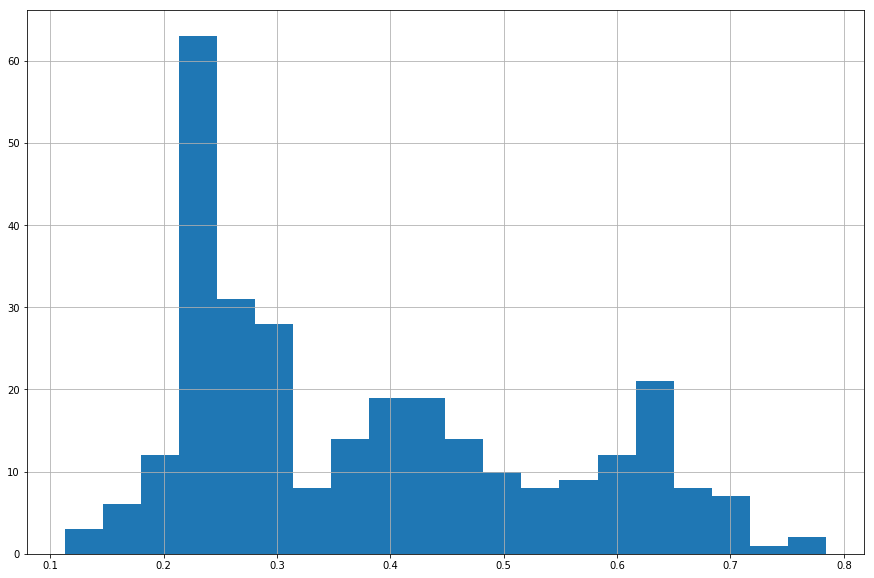

In [38]:
plt.figure(figsize=(15,10))

probs_df['pred_class_1'].hist(bins=20)

In [39]:
y_test.values

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [40]:
y_pred = (probs > 0.5).astype('int')

In [41]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

In [42]:
class_names = clf.classes_

Confusion matrix, without normalization
[[158  17]
 [ 60  60]]
Normalized confusion matrix
[[0.9 0.1]
 [0.5 0.5]]


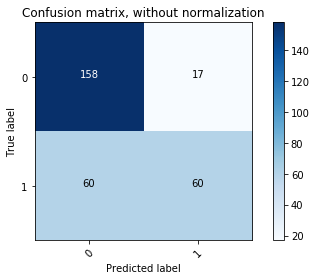

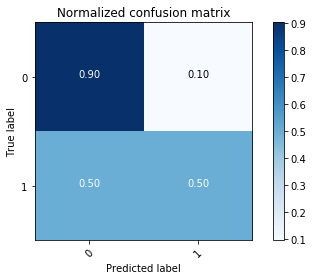

In [43]:
import itertools

from sklearn.metrics import confusion_matrix



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[158  17]
 [ 60  60]]


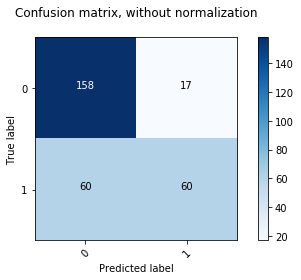

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization\n')
plt.show()

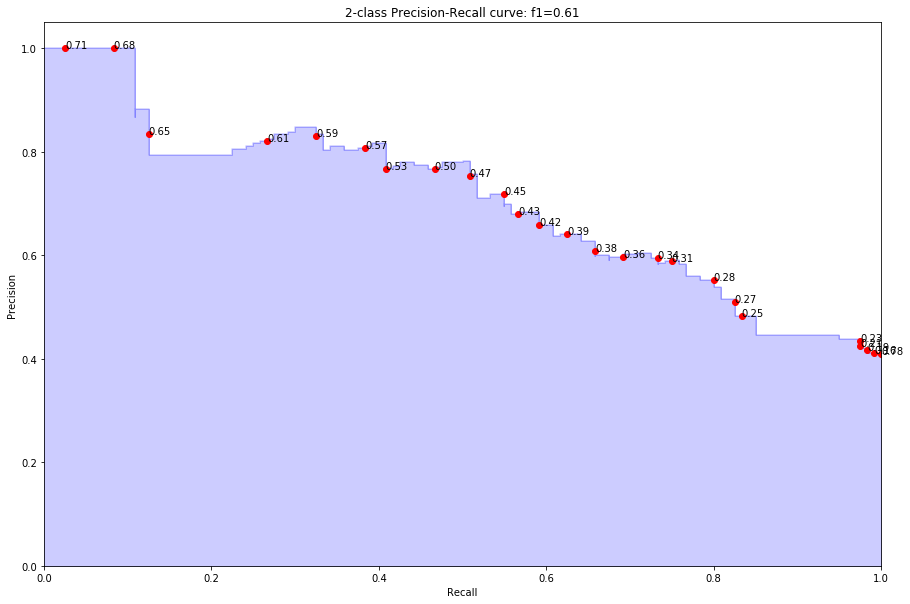

In [45]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

from sklearn.metrics import f1_score

plt.figure(figsize=(15,10))

f1 = f1_score(y_test, y_pred)

precision, recall, th = precision_recall_curve(y_test, probs)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: f1={0:0.2f}'.format(
          f1))

for i, (x, y) in enumerate(zip(recall, precision)):
    if i%5!=0:continue
    plt.plot((x,), (y,), 'ro')
    plt.text(x, y, '%0.2f' % (th[i-1])) #'{: 0.3f}'

In [46]:
t1 = [str(round(i,2)) for i in th[::2]]

In [47]:
len(th)

123

In [48]:
len(t)

NameError: name 't' is not defined

In [49]:
len(t2)

NameError: name 't2' is not defined

In [50]:
t2 = (len(t)-1)*[' ']

NameError: name 't' is not defined

In [51]:
t=[]

In [52]:
t = list()
for one in zip(t1,t2):
    t.append(one[0])
    t.append(one[1])

t.append(t1[-1])
print (t, len(t))

NameError: name 't2' is not defined